In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("product_name_sample_data.csv")
df.head()

,product_name,description
0,草本花香洗髮露 600毫升,揉合100%日本培植的有機草本植物，令髮絲彷如重生，令變得柔滑清爽，氛芳花香，令你彷如置身大...
1,Voost 運動水樽,VOOST MUG
2,完美遮瑕筆306 (1.5ml),質地柔亮潤澤，遮瑕的同時去除暗沉，作為 highlight 使用能提亮妝容<BR><BR>獨...
3,高效防脫增生洗髮液 150毫升,ANTI HAIR LOSS SHAMP
4,ISOTONIC 運動水溶片青檸檬味十片裝,幫助人體代謝碳水化合物、脂肪和蛋白質; 快速補充水份與電解質，促進神經肌肉傳導; 有助維持肌...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32372 entries, 0 to 32371
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  32361 non-null  object
 1   description   31501 non-null  object
dtypes: object(2)
memory usage: 505.9+ KB


In [4]:
df = df.fillna("*")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32372 entries, 0 to 32371
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  32372 non-null  object
 1   description   32372 non-null  object
dtypes: object(2)
memory usage: 505.9+ KB


In [6]:
df["combine"] = df["product_name"] + df["description"]
df.head()

,product_name,description,combine
0,草本花香洗髮露 600毫升,揉合100%日本培植的有機草本植物，令髮絲彷如重生，令變得柔滑清爽，氛芳花香，令你彷如置身大...,草本花香洗髮露 600毫升揉合100%日本培植的有機草本植物，令髮絲彷如重生，令變得柔滑清爽...
1,Voost 運動水樽,VOOST MUG,Voost 運動水樽VOOST MUG
2,完美遮瑕筆306 (1.5ml),質地柔亮潤澤，遮瑕的同時去除暗沉，作為 highlight 使用能提亮妝容<BR><BR>獨...,完美遮瑕筆306 (1.5ml)質地柔亮潤澤，遮瑕的同時去除暗沉，作為 highlight ...
3,高效防脫增生洗髮液 150毫升,ANTI HAIR LOSS SHAMP,高效防脫增生洗髮液 150毫升ANTI HAIR LOSS SHAMP
4,ISOTONIC 運動水溶片青檸檬味十片裝,幫助人體代謝碳水化合物、脂肪和蛋白質; 快速補充水份與電解質，促進神經肌肉傳導; 有助維持肌...,ISOTONIC 運動水溶片青檸檬味十片裝幫助人體代謝碳水化合物、脂肪和蛋白質; 快速補充水...


In [7]:
import re


def clean_text(text:str) -> str:
    # 去除 HTML 標籤
    text = re.sub(r'<.*?>', '', text)
    # 去除非字母字符
    text = re.sub(r'[^a-zA-Z\u4e00-\u9fa5]', ' ', text)
    # 轉換為小寫（僅針對英文）
    text = text.lower()

    return text

In [8]:
df["clean_text"] = df["combine"].apply(clean_text)
df["clean_text"].head()

0    草本花香洗髮露    毫升揉合    日本培植的有機草本植物 令髮絲彷如重生 令變得柔滑清爽...
1                                  voost 運動水樽voost mug
2    完美遮瑕筆        ml 質地柔亮潤澤 遮瑕的同時去除暗沉 作為 highlight ...
3                  高效防脫增生洗髮液    毫升anti hair loss shamp
4    isotonic 運動水溶片青檸檬味十片裝幫助人體代謝碳水化合物 脂肪和蛋白質  快速補充水...
Name: clean_text, dtype: object

In [9]:
def split_chinese_english(text):
    chinese_part = re.findall(r'[\u4e00-\u9fa5]+', text)
    english_part = re.findall(r'[a-zA-Z]+', text)
    return ' '.join(chinese_part), ' '.join(english_part)

In [10]:
df['chinese_part'], df['english_part'] = zip(*df['clean_text'].apply(split_chinese_english))
df["chinese_part"] = df["chinese_part"].apply(lambda x: re.sub(" ", "", x))
df[["chinese_part", "english_part"]].head()

,chinese_part,english_part
0,草本花香洗髮露毫升揉合日本培植的有機草本植物令髮絲彷如重生令變得柔滑清爽氛芳花香令你彷如置身...,
1,運動水樽,voost voost mug
2,完美遮瑕筆質地柔亮潤澤遮瑕的同時去除暗沉作為使用能提亮妝容獨有的斜面刷頭設計取代手指貼合面部...,ml highlight
3,高效防脫增生洗髮液毫升,anti hair loss shamp
4,運動水溶片青檸檬味十片裝幫助人體代謝碳水化合物脂肪和蛋白質快速補充水份與電解質促進神經肌肉傳...,isotonic stevia


In [11]:
def do_n_gram_chinese(doc: str, n: int=2) -> list[tuple[str, int]]:
    text = doc

    if doc:
        freq = {}
        for i in range(len(text) - (n-1)):
            n_gram = "".join(text[i:i+n]).lower()
            freq[n_gram] = freq.get(n_gram, 0) + 1

        freq = sorted(freq.items(), key=lambda word_count: word_count[1], reverse=True)

        return freq

    return [("", 0)]

In [12]:
def do_n_gram_english(doc: str, n: int=2) -> list[tuple[str, int]]:
    text = doc.split()

    if doc:
        freq = {}
        for i in range(len(text) - (n-1)):
            n_gram = " ".join(text[i:i+n]).lower()
            freq[n_gram] = freq.get(n_gram, 0) + 1

        freq = sorted(freq.items(), key=lambda word_count: word_count[1], reverse=True)

        return freq

    return [("", 0)]

In [13]:
all_chinese_text = df["chinese_part"].sum()

In [14]:
from sympy import residue

metrics = []

for i in range(1, 6):
    print(f"Now doing {i}_gram")

    chinese_n_gram = do_n_gram_chinese(all_chinese_text, n=i)

    result = pd.DataFrame(chinese_n_gram, columns=[f"{i}_gram", "freq"])
    uninqe_count = result.shape[0]
    total_count = result["freq"].sum()
    rare_ngrams = result['freq'][result['freq'] == 1].count()

    coverage = uninqe_count / total_count
    sparsity = rare_ngrams / total_count
    print(f"total uniqe {i}_gram: {uninqe_count}")
    print(f"coverage of {i}_gram: {coverage:.5f}")
    print(f"sparsity of {i}_gram: {sparsity:.5f}")

    metrics.append((i, uninqe_count, total_count, coverage, sparsity))

    print(result.head())
    print("\n")

Now doing 1_gram
total uniqe 1_gram: 4248
coverage of 1_gram: 0.00199
sparsity of 1_gram: 0.00022
  1_gram   freq
0      的  34378
1      膚  25013
2      肌  19301
3      有  18535
4      水  17247


Now doing 2_gram
total uniqe 2_gram: 215133
coverage of 2_gram: 0.10063
sparsity of 2_gram: 0.04011
  2_gram   freq
0     肌膚  15144
1     配方   6587
2     保濕   5941
3     使用   5885
4     精華   5198


Now doing 3_gram
total uniqe 3_gram: 569396
coverage of 3_gram: 0.26633
sparsity of 3_gram: 0.14011
  3_gram  freq
0    維他命  2816
1    屈臣氏  1830
2    防腐劑  1194
3    型美甲  1179
4    美甲片  1124


Now doing 4_gram
total uniqe 4_gram: 856792
coverage of 4_gram: 0.40076
sparsity of 4_gram: 0.24592
  4_gram  freq
0   透明質酸  1112
1   型美甲片  1040
2   膠原蛋白   824
3   指甲品牌   747
4   全新造型   746


Now doing 5_gram
total uniqe 5_gram: 1034673
coverage of 5_gram: 0.48396
sparsity of 5_gram: 0.32084
  5_gram  freq
0  指甲品牌全   744
1  甲品牌全新   744
2  品牌全新造   744
3  牌全新造型   744
4  全新造型美   744




In [15]:
metrics_df = pd.DataFrame(metrics, columns=["n", "uninqe_count", "total_count", "coverage", "sparsity"])
metrics_df

,n,uninqe_count,total_count,coverage,sparsity
0,1,4248,2137943,0.001987,0.000223
1,2,215133,2137942,0.100626,0.040107
2,3,569396,2137941,0.266329,0.140113
3,4,856792,2137940,0.400756,0.245924
4,5,1034673,2137939,0.483958,0.320837


<Axes: title={'center': 'n_gram uninqe_count'}, xlabel='n'>

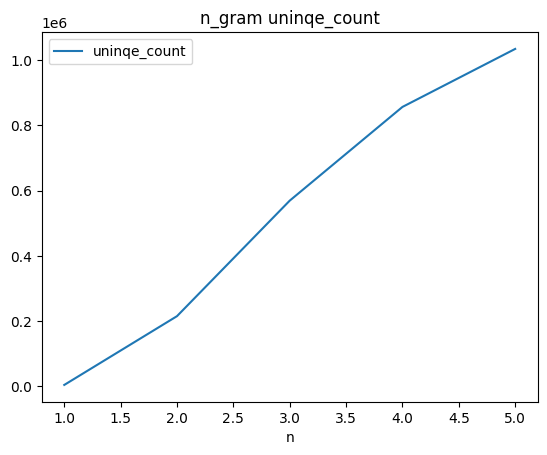

In [27]:
import matplotlib.pyplot as plt

metrics_df.plot(x="n", y="uninqe_count", title="n_gram uninqe_count")

<Axes: title={'center': 'n_gram total_count'}, xlabel='n'>

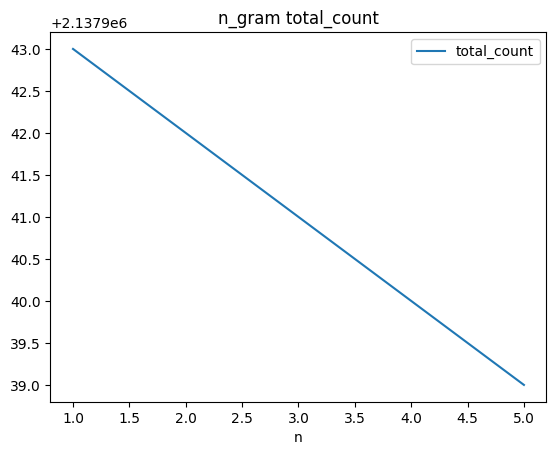

In [28]:
metrics_df.plot(x="n", y="total_count", title="n_gram total_count")

<Axes: title={'center': 'n_gram coverage'}, xlabel='n'>

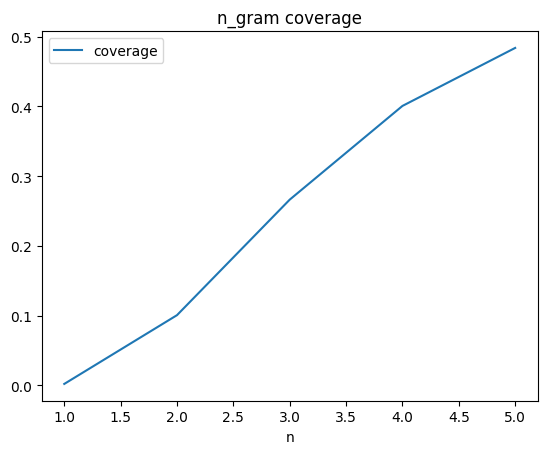

In [29]:
metrics_df.plot(x="n", y="coverage", title="n_gram coverage")

<Axes: title={'center': 'n_gram sparsity'}, xlabel='n'>

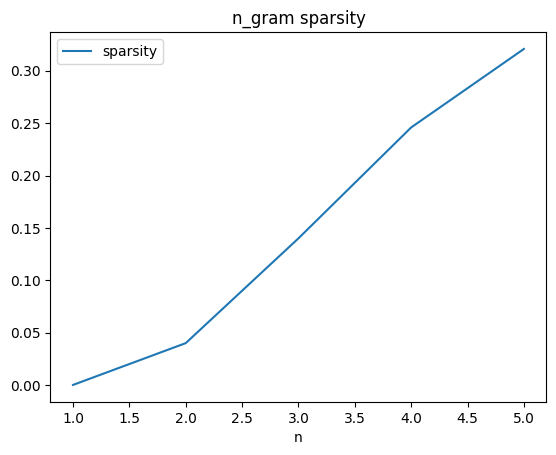

In [30]:
metrics_df.plot(x="n", y="sparsity", title="n_gram sparsity")